# Discrete Probability Distributions

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import binom, poisson
import scipy.special
import numpy as np
import janitor
import matplotlib.pyplot as plt
import string

In [2]:
pd.set_option("display.max_columns", 100)

## General

#### 4.1

In [3]:
pFather = .2
pMother = .1

In [4]:
p0 = (1-pFather)*(1-pMother)
p1 = (pFather)*(1-pMother) + (1-pFather)*(pMother)
p2 = pFather*pMother

In [5]:
X_pmf = {0: p0, 1: p1, 2: p2}
X_pmf

{0: 0.7200000000000001, 1: 0.26, 2: 0.020000000000000004}

#### 4.2

In [6]:
EX = sum((v*p for v, p in X_pmf.items()))
EX

0.30000000000000004

#### 4.3

In [7]:
[(a, (b-EX)**2) for a, b in X_pmf.items()]

[(0, 0.17640000000000003), (1, 0.001600000000000003), (2, 0.07840000000000001)]

In [8]:
varX = sum((p*(v-EX)**2 for v, p in X_pmf.items()))
varX

0.25

#### 4.4

X_cdf = 0, for X < 0

X_cdf = 0.72, for 0 <= X < 1

X_cdf = 0.98, for 1 <= X < 2

X_cdf = 1, for X >= 2

#### 4.5

In [9]:
50*49*48*47*46

254251200

In [10]:
scipy.special.perm(50, 5)

254251200.0

#### 4.6

In [11]:
50*49*48*47*46/(2*3*4*5)

2118760.0

In [12]:
scipy.special.comb(50, 5)

2118760.0

#### 4.7

In [13]:
{i: scipy.special.comb(10, i) for i in range(11)}

{0: 1.0,
 1: 10.0,
 2: 45.0,
 3: 120.0,
 4: 210.0,
 5: 252.0,
 6: 210.0,
 7: 120.0,
 8: 45.0,
 9: 10.0,
 10: 1.0}

#### 4.8

In [14]:
scipy.special.factorial(9, exact=True)

362880

#### 4.9

In [15]:
nStudents = 15
nInfluenza = 6
p = 0.2

In [16]:
pAtLeast6 = 1 - binom.cdf(nInfluenza-1, nStudents, p)
pAtLeast6

0.061051429617663966

#### 4.10

In [17]:
nStudents*p

3.0

#### 4.11

In [18]:
poisson.pmf(6, 4)

0.10419563456702102

####  4.12

In [19]:
1 - poisson.cdf(5, 4)

0.21486961296959484

#### 4.13

In [20]:
4

4

## Infectious disease

In [21]:
df = pd.DataFrame({
    'type': ['inner', 'urban', 'urban', 'suburban', 'suburban'],
    'tested': [3741, 11864, 5006, 3596, 6501],
    'positive': [30, 31, 11, 1, 8],
    'positivePer1000': [8, 2.6, 2.2, 0.3, 1.3]
    },
    index = list(string.ascii_uppercase[:5])
)
df

,type,tested,positive,positivePer1000
A,inner,3741,30,8.0
B,urban,11864,31,2.6
C,urban,5006,11,2.2
D,suburban,3596,1,0.3
E,suburban,6501,8,1.3


In [22]:
df.loc[:, 'prob'] = df.positive/df.tested
df

,type,tested,positive,positivePer1000,prob
A,inner,3741,30,8.0,0.008019
B,urban,11864,31,2.6,0.002613
C,urban,5006,11,2.2,0.002197
D,suburban,3596,1,0.3,0.000278
E,suburban,6501,8,1.3,0.001231


In [23]:
n = 500

#### 4.14

In [24]:
pExact5 = binom.pmf(5, n, df.loc['A', 'prob'])
pExact5

0.15730092954966352

#### 4.15

In [25]:
pAtLeast5 = 1-binom.cdf(4, n, df.loc['A', 'prob'])
pAtLeast5

0.37304962196658575

#### 4.16

In [26]:
l_app = df.loc['A', 'prob']*n
l_app

4.0096230954290295

In [27]:
pApprox5 = poisson.pmf(5, l_app)
pApprox5

0.15666764793825766

In [28]:
pAtLeast5 = 1-poisson.cdf(4, l_app)
pAtLeast5

0.37304309107737077

#### 4.17

In [29]:
pExact5 = binom.pmf(5, n, df.loc['C', 'prob'])
pExact5

0.0044011515133559505

#### 4.18

In [30]:
pAtLeast5 = 1-binom.cdf(4, n, df.loc['C', 'prob'])
pAtLeast5

0.005344167462020377

#### 4.19

In [31]:
l_app = df.loc['C', 'prob']*n
l_app

1.0986815821014781

In [32]:
pApprox5 = poisson.pmf(5, l_app)
pApprox5

0.004446585286401009

In [33]:
pAtLeast5 = 1-poisson.cdf(4, l_app)
pAtLeast5

0.005408567477783621

#### 4.20

In [34]:
pExact5 = binom.pmf(5, n, df.loc['E', 'prob'])
pExact5

0.0003915597559307621

#### 4.21

In [35]:
pAtLeast5 = 1-binom.cdf(4, n, df.loc['E', 'prob'])
pAtLeast5

0.0004351033414118355

#### 4.22

In [36]:
l_app = df.loc['E', 'prob']*n
l_app

0.6152899553914782

In [37]:
pApprox5 = poisson.pmf(5, l_app)
pApprox5

0.0003971923250212614

In [38]:
pAtLeast5 = 1-poisson.cdf(4, l_app)
pAtLeast5

0.00044179937716459783

## Infectious Disease

#### 4.23

In [39]:
l = 50/1e5
p10 = poisson.pmf(10, l)
p10

2.689799219576609e-40

## Otolaryngology

In [40]:
lam1y = 1.6

#### 4.24

In [41]:
1-poisson.cdf(2, 2*lam1y)

0.6200962589216269

#### 4.25

In [42]:
poisson.pmf(0, lam1y)

0.20189651799465538

#### 4.26

In [43]:
pAtLeast3 = 1-poisson.cdf(2,2*lam1y)
pBothSiblings = binom.pmf(2, 2, pAtLeast3)
pBothSiblings

0.38451937032859734

#### 4.27

In [44]:
pExactlyOne = binom.pmf(1, 2, pAtLeast3)
pExactlyOne

0.47115377718605905

#### 4.28

In [45]:
pNeither = binom.pmf(0, 2, pAtLeast3)
pNeither

0.14432685248534355

#### 4.29

In [46]:
pAtLeast3*2

1.2401925178432538

## Hypertension

#### 4.30

In [47]:
n = 10
k = 5
p = (0.5)**3

In [48]:
1-binom.cdf(k-1, 10, p)

0.00445452518761158

#### 4.31

In [49]:
n = 10
k = 7
p = 0.5

In [50]:
1-binom.cdf(k-1, 10, p)

0.171875

#### 4.32

In [51]:
mortality05 = (0.5)**3*.2
mortality04 = (1-0.4)**3*.2
mortality05, mortality04

(0.025, 0.043199999999999995)

## Renal Disease

In [52]:
p = 0.05

#### 4.33

In [53]:
1-binom.cdf(0, 5, p)

0.22621906250000023

#### 4.34

In [54]:
1-binom.cdf(2, 100, p)

0.8817370188148794

#### 4.35

In [55]:
p0 = (0.95)**2
p1 = 0.95*0.042 + 0.95*0.05
p2 = 0.05*0.2
p0, p1, p2, sum([p0, p1, p2])

(0.9025, 0.0874, 0.010000000000000002, 0.9999)

#### 4.36

In [56]:
p_mean = p0*0 + p1*1+ p2*2
p_mean

0.10740000000000001

#### 4.37

In [57]:
p_var = p0*(0-p_mean)**2 + p1*(1-p_mean)**2+ p2*(2-p_mean)**2
p_var

0.115864086524

## Pediatrics, Otolaryngology

In [58]:
otitis_free = [2500, 2425, 2375, 2300, 2180, 2000, 1875, 1700, 1500, 1300, 1250, 1225, 1200]

#### 4.38

In [59]:
having_otitis_6m = otitis_free[0] - otitis_free[6]
having_otitis_6m

625

In [60]:
prob6m = having_otitis_6m/otitis_free[0]
prob6m

0.25

In [61]:
having_otitis_12m = otitis_free[0] - otitis_free[12]
having_otitis_12m

1300

In [62]:
prob12m = having_otitis_12m/otitis_free[0]
prob12m

0.52

#### 4.39

In [63]:
having_otitis_9m = otitis_free[3] - otitis_free[9]
having_otitis_9m
prob9m = having_otitis_9m/otitis_free[3]
prob9m

0.43478260869565216

#### 4.40

In [64]:
pAtLeast3 = 1-binom.cdf(2, 5, prob6m)
pAtLeast3

0.103515625

#### 4.41

In [65]:
pAtLeast3*100

10.3515625

## Cancer, Epidemiology

In [66]:
pFirst4h = 0.05
pNext4h = 0.1
n = 20

#### 4.42

In [67]:
p2orLess = binom.cdf(2, n, pFirst4h)
p3orMore = 1 - p2orLess
p3orMore

0.07548367378849652

#### 4.43

In [68]:
n2 = n - 2
p2orLess2 = binom.cdf(2, n2, pNext4h)
p2orLess2

0.7337959947853291

#### 4.44

In [69]:
p0First4h = binom.pmf(0, n, pFirst4h) 
p0Next4h = binom.pmf(0, n, pNext4h) 
p08h = p0First4h*p0Next4h
p08h

0.043583519164244945

#### 4.45

In [70]:
p0First4h = binom.pmf(0, n, pFirst4h) 
p1Next4h = binom.pmf(1, n, pNext4h)

p1First4h = binom.pmf(1, n, pFirst4h) 
p0Next4h = binom.pmf(0, n-1, pNext4h)

p18h = p1First4h*p0Next4h + p0First4h*p1Next4h
p18h

0.14782714102492434

#### 4.46

In [71]:
p0First4h = binom.pmf(0, n, pFirst4h) 
p2Next4h = binom.pmf(2, n, pNext4h)

p1First4h = binom.pmf(1, n, pFirst4h) 
p1Next4h = binom.pmf(1, n-1, pNext4h)

p2First4h = binom.pmf(2, n, pFirst4h) 
p0Next4h = binom.pmf(0, n-2, pNext4h)

p28h = p0First4h*p2Next4h + p1First4h*p1Next4h + p2First4h*p0Next4h
p28h

0.23816594942904493

#### 4.47

In [72]:
def k_rats_die(k):
    p_tot = 0
    for k_first_4h in range(k+1):
        p4h = binom.pmf(k_first_4h, n, pFirst4h)
        p4h2 = binom.pmf(k-k_first_4h, n-k_first_4h, pNext4h)
        p_tot += p4h*p4h2
    return p_tot

In [73]:
{k:k_rats_die(k) for k in range(11)}

{0: 0.043583519164244945,
 1: 0.14782714102492434,
 2: 0.23816594942904493,
 3: 0.2423442994190275,
 4: 0.17467213393798314,
 5: 0.09479283058154889,
 6: 0.04018994279042281,
 7: 0.013631676502014807,
 8: 0.003756682778698522,
 9: 0.0008494643320253963,
 10: 0.00015846732275795393}

## Environmental Health

#### 4.48

In [74]:
p26orLess = poisson.cdf(26, 19)
p27orMore = 1-p26orLess
p27orMore

0.04855701267247359

Probability is lower then 0.5 so null hypothesis should be rejected

#### 4.49

In [75]:
p12 = poisson.pmf(12, 7)
p12

0.026349849726289943

#### 4.50

In [76]:
p11orLess = poisson.cdf(11, 7)
p12orMore = 1-p11orLess
p12orMore

0.053349623151558445

Near threshold

## Health promotion

#### 4.51

In [77]:
smoke_df = pd.read_csv('data/SMOKE.DAT.txt').clean_names().set_index('id')

In [78]:
smoke_df.loc[:, 'gender'] = smoke_df.loc[:, 'gender'].map({1:'male', 2:'female'})

In [79]:
smoke_df.head()

,age,gender,cig_day,co,min_last,logcoadj,day_abs
id,,,,,,,
1,61,male,30,270,60,1419,6
3,54,male,30,220,160,1393,3
4,67,male,30,270,50,1412,365
5,56,male,25,250,70,1392,16
8,54,male,30,255,70,1400,45


In [80]:
smoke_df.shape

(234, 7)

In [81]:
def create_smoke_df(df):
    months_end = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 365]
    df_abs = pd.DataFrame({'abstinent': [(df.day_abs>=d).sum() for d in months_end]}, index=range(13))
    df_abs.loc[:, 'prob_remain'] = df_abs.loc[12, 'abstinent']/df_abs.abstinent
    return df_abs

In [82]:
smoke_df

,age,gender,cig_day,co,min_last,logcoadj,day_abs
id,,,,,,,
1,61,male,30,270,60,1419,6
3,54,male,30,220,160,1393,3
4,67,male,30,270,50,1412,365
5,56,male,25,250,70,1392,16
8,54,male,30,255,70,1400,45
...,...,...,...,...,...,...,...
344,33,male,10,190,110,1298,6
345,37,male,20,85,700,1325,196
346,45,female,25,205,120,1337,0


In [83]:
create_smoke_df(smoke_df)

,abstinent,prob_remain
0,234,0.141026
1,85,0.388235
2,66,0.500000
3,56,0.589286
4,51,0.647059
5,47,0.702128
6,43,0.767442
7,41,0.804878
8,39,0.846154
9,36,0.916667


#### 4.52

In [84]:
smoke_df.groupby('gender').apply(create_smoke_df).unstack(level=0).reorder_levels([1,0], axis=1).sort_index(axis=1)

gender    female                  male            
       abstinent prob_remain abstinent prob_remain
0            124    0.129032       110    0.154545
1             44    0.363636        41    0.414634
2             36    0.444444        30    0.566667
3             31    0.516129        25    0.680000
4             28    0.571429        23    0.739130
5             27    0.592593        20    0.850000
6             24    0.666667        19    0.894737
7             23    0.695652        18    0.944444
8             21    0.761905        18    0.944444
9             18    0.888889        18    0.944444
10            18    0.888889        18    0.944444
11            17    0.941176        17    1.000000
12            16    1.000000        17    1.000000

## Genetics

#### 4.53

In [85]:
sexrat_df = pd.read_csv('data/SEXRAT.DAT.txt').clean_names()#.set_index('id')
sexrat_df.sample(5)

,nm_chld,sx_1,sx_2,sx_3,sx_4,sx_5,sexchldn,num_fam
11,3,'F','F','F',NaN,NaN,'FFF',1498
21,4,'F','M','M','F',NaN,'FMMF',406
32,5,'M','M','F','M','M','MMFMM',524
14,4,'M','M','F','M',NaN,'MMFM',466
28,5,'M','M','M','M','M','MMMMM',549


## Infectious disease

In [86]:
pLight = 0.4
pHeavy = 0.55

#### 4.54

In [87]:
binom.pmf(3, 5, pLight)

0.2304

#### 4.55

In [88]:
p2OrLess = binom.cdf(2, 5, pLight)
p3OrMore = 1 - p2OrLess
p3OrMore

0.3174400000000003

In [89]:
def n_users_positive(k):
    p_tot = 0
    for n_light in range(k+1):
        p_light = binom.pmf(n_light, 10, pLight)
        p_heavy = binom.pmf(k-n_light, 10, pHeavy)
#         print(p_light, p_heavy)
        p_tot += p_light*p_heavy
    return p_tot


In [90]:
n_users_positive(3)

0.001950288921215897

#### 4.56 

In [91]:
p3orLess = sum(n_users_positive(i) for i in range(4))
p4OrMore = 1 - p3orLess
p4OrMore

0.9976614156548486

#### 4.57

In [92]:
dist = {i: n_users_positive(i) for i in range(21)}

#### 4.58

<BarContainer object of 21 artists>

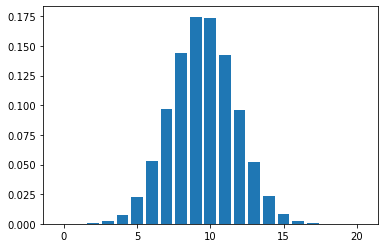

In [93]:
plt.bar(dist.keys(), dist.values())

## Opthalomology, Diabetes

In [94]:
p30to39male = 0.67/100
p30to39female = 0.74/100

#### 4.59

In [95]:
binom.pmf(2, 200, p30to39male)

0.23600918502852955

#### 4.60

In [96]:
binom.pmf(2, 200, p30to39female)

0.25039297858775156

#### 4.61

In [97]:
pYear = [(1-p30to39male)**(i-1)*p30to39male for i in range(1, 11)]
pYear

[0.0067,
 0.00665511,
 0.006610520762999999,
 0.0065662302738878995,
 0.00652223653105285,
 0.006478537546294795,
 0.00643513134473462,
 0.006392015964724899,
 0.006349189457761242,
 0.006306649888394241]

In [98]:
pTotal = sum(pYear)
pTotal

0.06501562176985054

#### 4.62

In [99]:
pYear = [(1-p30to39female)**(i-1)*p30to39female for i in range(1, 20)]

In [100]:
np.where(np.cumsum(pYear) >.1)

(array([14, 15, 16, 17, 18], dtype=int64),)

#### 4.63

In [101]:
# todo

## Cardiovascular Disease

#### 4.64

In [102]:
kBefore = 15.6
kQuake = 51

In [103]:
poisson.pmf(kQuake, kBefore)

7.650953277058436e-13

#### 4.65

Yes

#### 4.66

In [104]:
poisson.pmf(20, kBefore), poisson.pmf(21, kBefore)

(0.050277471965869874, 0.03734897917464633)

20 heart attack would be consistent

## Environmental Health

In [105]:
admPerday = 2

#### 4.67

In [106]:
{b:poisson.cdf(b, admPerday) for b in range(1,10)}

{1: 0.40600584970983794,
 2: 0.6766764161830634,
 3: 0.857123460498547,
 4: 0.9473469826562889,
 5: 0.9834363915193856,
 6: 0.9954661944737512,
 7: 0.9989032810321413,
 8: 0.9997625526717389,
 9: 0.9999535019249828}

5 beds re needed

#### 4.68

In [107]:
{b:poisson.cdf(b, 4) for b in range(1,10)}

{1: 0.0915781944436709,
 2: 0.23810330555354436,
 3: 0.43347012036670896,
 4: 0.6288369351798734,
 5: 0.7851303870304052,
 6: 0.8893260215974264,
 7: 0.9488663842071527,
 8: 0.9786365655120158,
 9: 0.9918677572030661}

8 beds are needed

#### 4.69

In [108]:
pNormalDay = 345/365
pHeavyDay = 1-pNormalDay
pNormal = poisson.pmf(4, admPerday)
pHeavy = poisson.pmf(4, 4)
pTotal = pNormalDay*pNormal + pHeavyDay*pHeavy
pTotal

0.09598479846762796

#### 4.70

In [109]:
l2 = pNormalDay*admPerday + pHeavyDay*4
{b:poisson.cdf(b, l2) for b in range(1,10)}

{1: 0.3771552152359418,
 2: 0.6470427622921122,
 3: 0.8368266994914284,
 4: 0.9369182280143554,
 5: 0.9791486263500561,
 6: 0.9939967572717409,
 7: 0.9984715364536184,
 8: 0.999651529594045,
 9: 0.9999281185493353}

5 beds

## Women's Health

#### 4.71

In [110]:
abortionsByYear = pd.DataFrame({'year':range(1975, 2005), 'rate':[21]*5+[25]*5+[24]*10+[20]*10})
abortionsByYear.rate /= 1000.0

In [111]:
pAbortion = 0
pNoAbortion = 1
for i, row in abortionsByYear.iterrows():
    pAbortion += pNoAbortion*row.rate
    pNoAbortion *= (1-row.rate)

In [112]:
pAbortion

0.4921967558248713

#### 4.72

In [113]:
nAbortion = 16359
nPersYear = 2169321

In [114]:
25*nPersYear/1000

54233.025

#### 4.73

In [115]:
rateNurses = nAbortion/nPersYear*1000

In [116]:
poisson.cdf(rateNurses, 25) # < 0.05

2.2924802870445876e-05

## Endocrinology

In [117]:
df = pd.read_csv('data/BONEDEN.DAT.txt').clean_names()
df.head()

,id,age,zyg,ht1,wt1,tea1,cof1,alc1,cur1,men1,pyr1,ls1,fn1,fs1,ht2,wt2,tea2,cof2,alc2,cur2,men2,pyr2,ls2,fn2,fs2
0,1002501,27,2,162,57,35,0,1,1,0,0.0,0.81,0.72,1.00,160,56,42,21,0,0,0,13.75,0.76,0.68,1.04
1,1015401,42,2,165,76,42,2,3,5,1,0.0,1.01,0.74,0.99,159,72,20,21,1,1,0,48.00,0.89,0.64,1.11
2,1027601,59,2,150,114,12,0,0,0,1,0.0,0.75,0.63,1.05,156,54,7,28,0,0,1,20.50,0.51,0.64,0.86
3,1034301,61,1,159,62,56,0,0,0,1,0.0,0.81,0.64,1.12,162,58,21,35,0,0,1,29.75,0.85,0.69,1.03
4,1121202,47,2,159,58,28,14,0,0,0,0.0,0.78,0.70,1.14,150,58,91,0,0,1,1,25.00,0.59,0.54,0.96


In [118]:
df.loc[:, 'pyr_diff'] = df.pyr2 - df.pyr1
df.sort_values('pyr_diff', inplace=True, ascending=False)

#### 4.74

In [119]:
df.loc[:, 'ls_diff'] = df.ls2 - df.ls1

In [120]:
n_expected = df.shape[0]//2
n_actual = (df.ls_diff < 0).sum()
n_expected, n_actual

(20, 28)

In [121]:
pAtLeastActual = 1 - binom.cdf(n_actual-1, df.shape[0], 0.5)
pAtLeastActual

0.013766577914793743

Is related, p < 0.05

#### 4.75

In [122]:
df_20 = df.head(20)

In [123]:
n_expected = df_20.shape[0]//2
n_actual = (df_20.ls_diff < 0).sum()
n_expected, n_actual

(10, 17)

In [124]:
pAtLeastActual = 1 - binom.cdf(n_actual-1, df_20.shape[0], 0.5)
pAtLeastActual

0.0012884140014648438

Is related, p < 0.05

#### 4.76

In [125]:
df.loc[:, 'fn_diff'] = df.fn2 - df.fn1

In [126]:
n_expected = df.shape[0]//2
n_actual = (df.fn_diff < 0).sum()
n_expected, n_actual

(20, 22)

In [127]:
pAtLeastActual = 1 - binom.cdf(n_actual-1, df.shape[0], 0.5)
pAtLeastActual

0.37761432875231515

Is not related

#### 4.77

In [128]:
df_20 = df.head(20)

In [129]:
n_expected = df_20.shape[0]//2
n_actual = (df_20.fn_diff < 0).sum()
n_expected, n_actual

(10, 15)

In [130]:
pAtLeastActual = 1 - binom.cdf(n_actual-1, df_20.shape[0], 0.5)
pAtLeastActual

0.020694732666015625

Is related, p < 0.05

#### 4.78

In [131]:
df.loc[:, 'fs_diff'] = df.fs2 - df.fs1

In [132]:
n_expected = df.shape[0]//2
n_actual = (df.fs_diff < 0).sum()
n_expected, n_actual

(20, 24)

In [133]:
pAtLeastActual = 1 - binom.cdf(n_actual-1, df.shape[0], 0.5)
pAtLeastActual

0.17444443972453882

Is not related

#### 4.79

In [134]:
df_20 = df.head(20)

In [135]:
n_expected = df_20.shape[0]//2
n_actual = (df_20.fs_diff < 0).sum()
n_expected, n_actual

(10, 13)

In [136]:
pAtLeastActual = 1 - binom.cdf(n_actual-1, df_20.shape[0], 0.5)
pAtLeastActual

0.13158798217773438

Is not related

## Simulation

#### 4.80

In [137]:
pSucc = 0.05
nTrials = 10
nSamples = 100
sim = binom.rvs(nTrials, pSucc, size=nSamples)

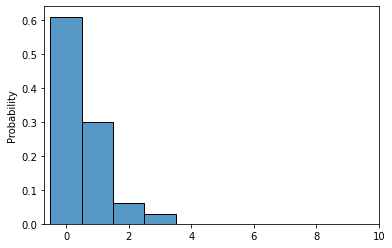

In [138]:
sns.histplot(sim, discrete=True, stat='probability')
plt.xlim(right=nTrials);

#### 4.81

In [139]:
pSucc = 0.95
nTrials = 10
nSamples = 100
sim = binom.rvs(nTrials, pSucc, size=nSamples)

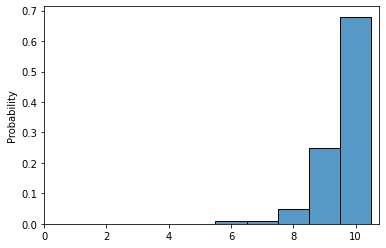

In [140]:
sns.histplot(sim, discrete=True, stat='probability')
plt.xlim(left=0);

#### 4.82

In [141]:
pSucc = 0.5
nTrials = 10
nSamples = 100
sim = binom.rvs(nTrials, pSucc, size=nSamples)

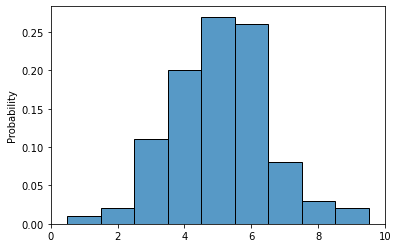

In [142]:
sns.histplot(sim, discrete=True, stat='probability')
plt.xlim(left=0, right=nTrials);

## Cancer [check!]

In [143]:
n0 = 1e8
pMutate1 = 1e-7
mutPerYear = n0*pMutate1
mutPerYear

10.0

#### 4.83

In [144]:
1-poisson.cdf(4, mutPerYear)

0.9707473119230389

#### 4.84

In [145]:
n0*pMutate1*(45-20+1)

260.0

#### 4.85

In [146]:
nIntermediate = 300
pMalignant = 5e-7

In [147]:
lam = nIntermediate*pMalignant
lam

0.00015

In [148]:
1-poisson.pmf(0, lam)

0.00014998875056249084

## Dentistry

In [149]:
dfDentistry = pd.DataFrame({'teeth_lost': [0,1,2,3,4,7,12], 'freq':[35763, 1978, 591, 151, 163, 106, 153]})

#### 4.86

In [150]:
pTeethLossYearly = (dfDentistry.teeth_lost*dfDentistry.freq).sum()/dfDentistry.freq.sum()

#### 4.87

In [151]:
pTeethLoss = 30*pTeethLossYearly
pTeethLoss

5.276699653000899

In [152]:
1-poisson.cdf(2, pTeethLoss)

0.8968006098385123

#### 4.88

In [153]:
pTeethLossYearly2 = pTeethLossYearly/2
pTeethLoss1_15 = 15*pTeethLossYearly
pTeethLoss2_15 = 15*pTeethLossYearly2
pTeethLoss1_15, pTeethLoss2_15

(2.6383498265004497, 1.3191749132502248)

In [154]:
# max 2 teeth can be lost
# so 0+0, 1+0, 0+1, 2+0, 1+1, 0+2
cases = [(0,0), (0,1), (1,0), (2,0), (0,2), (1,1)]
pNoNeedDentures = sum(poisson.pmf(i, pTeethLoss1_15)*poisson.pmf(j, pTeethLoss2_15) for (i,j) in cases)
pNeedDentures = 1-pNoNeedDentures
pNeedDentures

0.7556066825825027

## Hospital Epidomiology

In [155]:
nAdmWeekday = 2
nAdmWeekend = 1

#### 4.89

In [156]:
1-poisson.pmf(0, nAdmWeekday)

0.8646647167633873

#### 4.90

In [157]:
1-poisson.pmf(0, nAdmWeekend)

0.6321205588285577

#### 4.91

In [158]:
p0 = poisson.pmf(0, nAdmWeekday)*poisson.pmf(0, nAdmWeekend)
p0

0.04978706836786395

In [159]:
p1 = poisson.pmf(0, nAdmWeekday)*poisson.pmf(1, nAdmWeekend) + poisson.pmf(1, nAdmWeekday)*poisson.pmf(0, nAdmWeekend)
p1

0.14936120510359185

In [160]:
p2OrMore = 1-p0-p1
p2OrMore

0.8008517265285442

##  Obstetrics

In [161]:
pHighSES = 50/100000
pLowSES = 100/100000

#### 4.92

In [162]:
births = 5000
k = 5
binom.pmf(k, births, pHighSES)

0.06679258104027606

In [163]:
lamHighSAS = births*pHighSES
poisson.pmf(k, lamHighSAS)

0.06680094289054267

#### 4.93

In [164]:
binom.pmf(1, births, pHighSES)+binom.pmf(0, births, pHighSES)

0.2872205239261886

In [165]:
births = 12000
kOrMore = 8
1-binom.cdf(kOrMore, births, pLowSES)

0.845103312140432

In [166]:
1-poisson.cdf(kOrMore, births*pLowSES)

0.844972218232537

#### 4.94

In [167]:
nHigh = (5+5)*1000
nLow = (12+10+8+7+20+3)*1000
nHigh, nLow

(10000, 60000)

In [168]:
pHigh = nHigh*pHighSES
pLow = nLow*pLowSES
pTotal = pHigh+pLow

In [169]:
pComeFromLow = pLow/pTotal
pComeFromLow

0.9230769230769231

##### 4.95

In [170]:
pTotal

65.0

## Emergency Medicine

In [171]:
pIFM = 11920/7168118
pIFM

0.0016629190535088847

#### 4.96

In [172]:
n1year = pIFM*2*300
1-poisson.pmf(0, n1year)

0.6312924262207573

#### 4.97

In [173]:
n20Yrs = 20*n1year
1-poisson.pmf(9, n20Yrs)

0.9970190867261381

#### 4.98

In [174]:
n20Yrs

19.955028642106615

In [175]:
pDIV = 875/7168118
n20Yrs = pDIV*2*300*20
1-poisson.pmf(0, n20Yrs)

0.7688803266269941

## Epidemiology

In [176]:
pEligible = 3.1/100
pAgreed = 0.52
pEliAgree = pEligible*pAgreed

#### 4.99

In [177]:
n = 100
1-binom.cdf(1,n,pEliAgree)

0.4805356763539085

#### 4.100

In [178]:
n = 1000
1-binom.cdf(9,n,pEliAgree)

0.9603512995914727

## Cancer

In [179]:
pAresp = 0.06
pBresp = 0.16

#### 4.101

In [180]:
n = 20
pEx5 = binom.pmf(5, 20, pBresp)
pEx5

0.11891399339185367

#### 4.102

In [181]:
n = 20
pAtLeast3 = 1-binom.cdf(2, 20, pBresp)
pAtLeast3

0.6420016781612481

#### 4.103

In [182]:
cases = [(0,3), (1,2), (2,1)] # there is no (3,0) because only 2 developed arrythmia so cannot be 3 people

p3 = sum(binom.pmf(nA, 2, pBresp)*binom.pmf(nB, 8, pBresp) for (nA, nB) in cases)
p3

0.14504280713991294

## Cancer

#### 4.104

#### 4.105

#### 4.106